In [25]:
%run '~/work/pyhton-for-the-data-scientist/Data/DVF.ipynb'

Code service sages            100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.915336
No voie                        35.686981
B/T/Q                          95.316833
Type de voie                   38.409037
Code voie                       0.767595
Voie                            0.772418
Code postal                     0.770589
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.549758
Section                         0.004091
No plan                         0.000000
No Volume                      99.783828
1er lot         

In [26]:
df_DVF=df5

# Statistique descriptive exploratoire

On cherche d'abord à manipuler les bases de données en notre possession de manière très descriptive pour tirer des premiers enseignements des données disponibles

> ## Prix constatés de DVF

On s'intéresse d'abord aux prix déclarés et disponibles sur le site de DVF (Demande de valeurs foncières). Ce sont des prix pour l'année 2021 concernant les transactions à Marseille.

In [27]:
round(df_DVF.describe(),2)

,Valeur fonciere,Surface reelle bati
count,1143.00,1143.00
mean,532362.04,46.43
std,352294.36,32.70
min,30000.00,1.00
25%,295000.00,27.00
50%,440000.00,37.00
75%,700000.00,56.00
max,1900000.00,410.00


Notre jeu de données comporte 2745 individus. On se concentre sur 3 variables :
- La **valeur foncière** : Un bien appartement vendu en 2021 à Marseille valait en moyenne 532 362€. La variance de la valeur foncière est énorme : les prix sont éclatés et ne suivent en effet pas du tout une loi normale.
- La **surface bâtie** : Un bien immobilier bâti vendu à Marseille en 2021 faisait en moyenne 46,5 $m{^2}$, et la médiane est de 37 $m{^2}$. La variance de la surface bâtie est beaucoup moins élevée que pour la valeur foncière.

In [28]:
import scipy.stats.mstats as mstats

Représentons maintenant le prix moyen constaté du $m{^2}$ à la vente à Marseille en 2021 en fonction des arrondissements :

In [29]:
DVFmoy=df_DVF.groupby("Commune", as_index=False).mean(numeric_only=True)
round(DVFmoy, 2)

,Commune,Valeur fonciere,Surface reelle bati
0,MARSEILLE 10EME,399420.35,34.65
1,MARSEILLE 11EME,424264.00,60.43
2,MARSEILLE 12EME,435266.98,49.34
3,MARSEILLE 13EME,362275.07,55.04
4,MARSEILLE 14EME,303087.50,65.29
5,MARSEILLE 15EME,316348.22,47.48
6,MARSEILLE 16EME,274055.00,51.45
7,MARSEILLE 1ER,763347.41,50.26
8,MARSEILLE 2EME,391222.22,39.67
9,MARSEILLE 3EME,462904.39,34.04


In [30]:
DVFmoy['sort'] = DVFmoy['Commune'].str.extract('(\d+)', expand=False).astype(int)
DVFmoy.sort_values('sort',inplace=True, ascending=True)
DVFmoy=DVFmoy.drop('sort', axis=1)
DVFmoy

,Commune,Valeur fonciere,Surface reelle bati
7,MARSEILLE 1ER,763347.413793,50.258621
8,MARSEILLE 2EME,391222.222222,39.666667
9,MARSEILLE 3EME,462904.390244,34.036585
10,MARSEILLE 4EME,387925.270270,36.351351
11,MARSEILLE 5EME,580389.285714,41.154762
12,MARSEILLE 6EME,927342.975207,46.867769
13,MARSEILLE 7EME,680100.000000,54.100000
14,MARSEILLE 8EME,791150.925556,72.638889
15,MARSEILLE 9EME,643576.923077,45.134615
0,MARSEILLE 10EME,399420.354839,34.645161


In [31]:
DVFmoy["Prix au m2"]=DVFmoy['Valeur fonciere']/DVFmoy['Surface reelle bati']
DVFmoy=round(DVFmoy, 2)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1600x800 with 0 Axes>

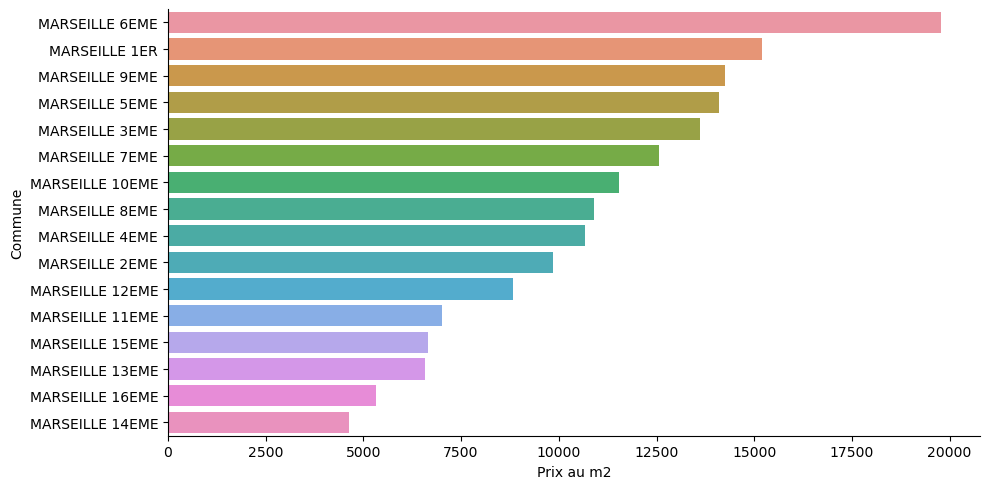

In [33]:
plt.figure(figsize=(16,8))
sns.catplot(data=DVFmoy.sort_values("Prix au m2", ascending=False), x='Prix au m2', y='Commune', kind='bar', aspect=2, legend='Prix au m2 comprenant les terrains')
plt.show()

Ainsi, les biens immobiliers construits dont le prix de vente au $m{^2}$ était lee plus élevé en 2021 se situent dans les premiers arrondissements de Marseille, en particulier le 6ème, le 1er, le 3ème et le 5ème.

/tmp/ipykernel_46489/2781322810.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_arrtest=data_arrtest.drop('loyer m2', 1)


,Unnamed: 0,prix m2
0,Marseille 1er Arrondissement,3 610 €/m2
1,Marseille 2e Arrondissement,3 967 €/m2
2,Marseille 3e Arrondissement,2 171 €/m2
3,Marseille 4e Arrondissement,3 321 €/m2
4,Marseille 5e Arrondissement,3 784 €/m2
5,Marseille 6e Arrondissement,4 316 €/m2
6,Marseille 7e Arrondissement,5 603 €/m2
7,Marseille 8e Arrondissement,5 686 €/m2
8,Marseille 9e Arrondissement,4 529 €/m2
9,Marseille 10e Arrondissement,3 531 €/m2


,prix m2,Prix au m2
0,3 610 €/m2,11528.89
1,3 967 €/m2,7021.14
2,2 171 €/m2,8821.85
3,3 321 €/m2,6581.50
4,3 784 €/m2,4642.05
5,4 316 €/m2,6662.49
6,5 603 €/m2,5326.63
7,5 686 €/m2,15188.39
8,4 529 €/m2,9862.75
9,3 531 €/m2,13600.20


In [63]:
dff=pd.DataFrame(dfmix['prix m2'].str.split('€', expand=True)[0])
dff=dff.rename(columns={0:'prix m2'})
dff=dff.astype(str)
dff

,prix m2
0,3 610
1,3 967
2,2 171
3,3 321
4,3 784
5,4 316
6,5 603
7,5 686
8,4 529
9,3 531


In [65]:
dfff=pd.DataFrame(dff['prix m2'].str.replace(' ',''))
dfff

,prix m2
0,3 610
1,3 967
2,2 171
3,3 321
4,3 784
5,4 316
6,5 603
7,5 686
8,4 529
9,3 531


In [51]:
dfff=dfff.astype(str)
dfff.dtypes

prix m2    object
dtype: object

In [67]:
dfmix=pd.concat([dfff,DVFmoy['Prix au m2']], axis=1)
dfmix=dfmix.astype({'prix m2':str})
dfmix.dtypes

prix m2        object
Prix au m2    float64
dtype: object

In [68]:
dfmix.corr(dfmix['Prix au m2'])

/tmp/ipykernel_46489/3019526079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfmix.corr(dfmix['Prix au m2'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/tmp/ipykernel_1008/1262782662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = sns.heatmap(dfmix.corr(), cmap='coolwarm', annot=True, fmt=".2f")


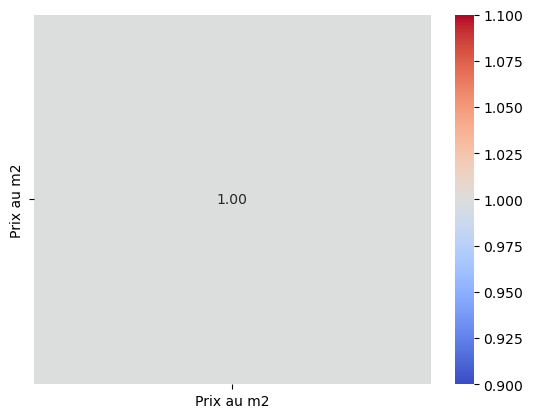

In [303]:
Corr = sns.heatmap(dfmix.corr(), cmap='coolwarm', annot=True, fmt=".2f")